In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
df = pd.read_csv('train.csv')

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df1 = df.drop(columns=["PassengerId","Name","Ticket","Cabin"])
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [39]:
df2 = df1.dropna(how="any")

<Axes: xlabel='Age', ylabel='Count'>

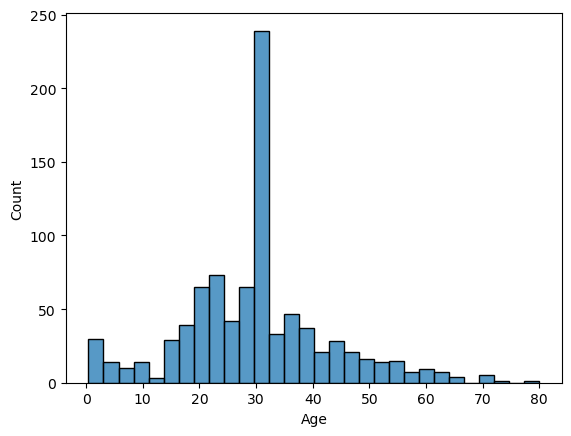

In [40]:
sns.histplot(df2['Age'])

<Axes: xlabel='Survived', ylabel='count'>

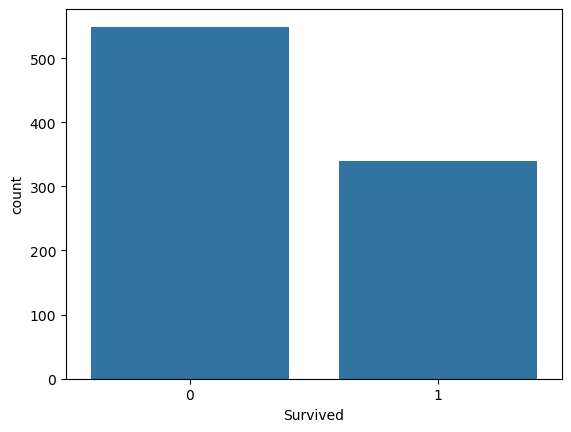

In [41]:
sns.countplot(df2, x="Survived")

In [42]:
df2["Survived"].sum() / df2.shape[0] * 100

np.float64(38.24521934758155)

<Axes: >

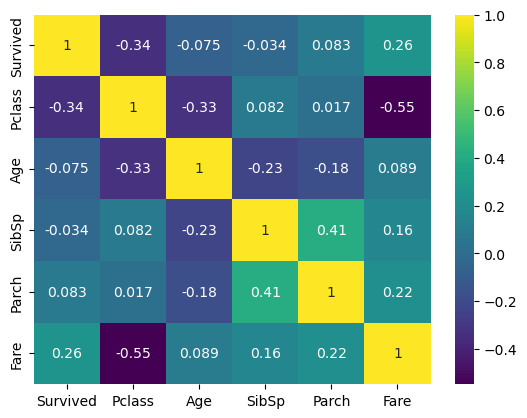

In [43]:
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

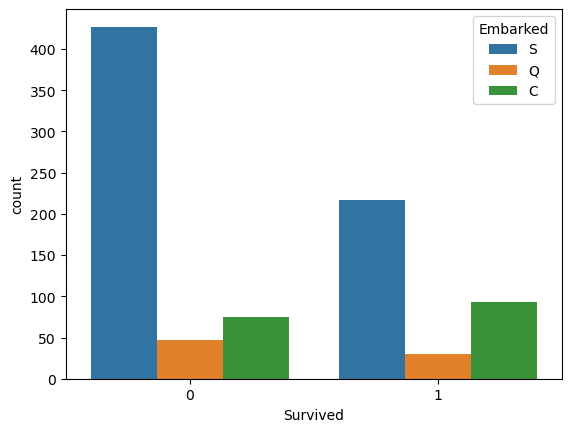

In [44]:
sns.countplot(df2, x="Survived", hue="Embarked")

<Axes: xlabel='Survived', ylabel='Fare'>

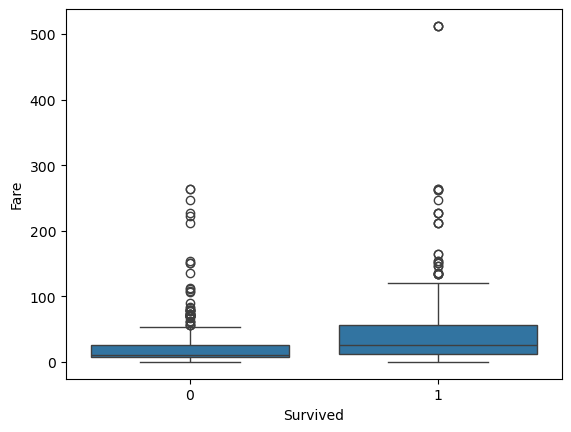

In [45]:
sns.boxplot(df2, x='Survived', y='Fare')

In [46]:
df3 = pd.get_dummies(df2, drop_first=True)
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [47]:
y = df3["Survived"]
X = df3.drop(columns="Survived")

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(random_state=0)

In [50]:
# params = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

params = {
    'max_depth': [3,5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [300, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [51]:
model = GridSearchCV(rf, params, scoring=scoring, cv= 5, refit='roc_auc', n_jobs=-1)

In [52]:
model.fit(X, y)

/home/ger/src/titanic/.conda/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [53]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [54]:
model.best_score_

np.float64(0.8698209292057106)

In [55]:
test = pd.read_csv('test.csv')

X_test = test.drop(columns=["PassengerId","Name","Ticket","Cabin"])
X_test = pd.get_dummies(X_test, drop_first=True)

In [56]:
y_pred = model.predict(X_test)

In [57]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [58]:
make_results('decision tree cv', model, 'auc')

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.835822,0.711765,0.76691,0.835809,0.869821


In [59]:
df4 = pd.DataFrame(y_pred, columns=["Survived"])
df4

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [60]:
result = pd.concat([test['PassengerId'], df4], axis=1)

In [61]:
result.to_csv('submission.csv', index=False)